# Desafio 4

## 1. Introdução ao Pandas 

Já visto nas aulas anteriores.

## 2. Carregar o arquivo JSON


In [42]:
import simplejson as json
import pandas as pd

In [43]:
dados = []
with open('tweets_5min.json') as arquivo:
    for linha in arquivo:
        dados.append(json.loads(linha))

In [44]:
df = pd.DataFrame(dados)

In [45]:
print(df.columns)

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'extended_tweet', 'favorite_count',
       'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'reply_count',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'text',
       'timestamp_ms', 'truncated', 'user'],
      dtype='object')


In [46]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,None,Fri Jul 07 02:05:54 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""Http://www.hwswworld.com"" rel=""nofoll...",itantenna : AI Big Data Cloud Training Slides ...,1499393154105,False,"{'id': 2319610428, 'id_str': '2319610428', 'na..."
1,None,None,Fri Jul 07 02:05:54 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""Http://www.hwswworld.com"" rel=""nofoll...",itantenna : Quantum Big Data Cloud AI Book Cha...,1499393154053,False,"{'id': 2319610428, 'id_str': '2319610428', 'na..."
2,None,None,Fri Jul 07 02:05:54 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""Http://www.hwswworld.com"" rel=""nofoll...",itantenna : Quantum Big Data Cloud AI Book Cha...,1499393154144,False,"{'id': 2319610428, 'id_str': '2319610428', 'na..."
3,None,None,Fri Jul 07 02:05:55 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""Http://www.hwswworld.com"" rel=""nofoll...",itantenna : Quantum Big Data Cloud AI Book Cha...,1499393155308,False,"{'id': 2319610428, 'id_str': '2319610428', 'na..."
4,None,None,Fri Jul 07 02:05:55 +0000 2017,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0,False,low,...,NaN,NaN,0,False,NaN,"<a href=""Http://www.hwswworld.com"" rel=""nofoll...",BurkeCore : Quantum Big Data Cloud AI Book Cha...,1499393155950,False,"{'id': 2319610428, 'id_str': '2319610428', 'na..."


In [47]:
print(len(df))

88


## 3. Definir o que iremos salvar!

Vamos salvar:

* text
* created_at
* coordinates
* retweet_count
* user -> screen_name
* user -> location
* user -> lang
* user -> followers_count



In [48]:
print("--> Dados do tweet")
print(df['text'][0])
print(df['created_at'][0])
print(df['coordinates'][0])
print(df['retweet_count'][0])

print("\n--> Dados do usuário")
print(df['user'][0]['screen_name'])
print(df['user'][0]['location'])
print(df['user'][0]['lang'])
print(df['user'][0]['followers_count'])


--> Dados do tweet
itantenna : AI Big Data Cloud Training Slides https://t.co/jyu8B8oSJE Software Engineering Ada GRADY BOOCH : https://t.co/wupzvkkrav
Fri Jul 07 02:05:54 +0000 2017
None
0

--> Dados do usuário
ClouDatAI
San Francisco, CA
en
1333


Agora vamos criar uma lista chamada colunas para salvar os nomes das colunas que queremos ter em nosso DataFrame.

In [49]:
colunas = ['text', 'created_at', 'coordinates', 'retweet_count', 'screen_name', 
           'location', 'lang', 'followers_count']

In [50]:
print(len(colunas))

8


Vamos criar um dataframe auxiliar para salvar somente os dados que queremos.

In [51]:
df_aux = pd.DataFrame(columns=colunas)
df_aux

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count


Agora iremos adicionar apenas uma linha para entender como essa estrutura funciona.

Lembre-se que estamos recuperando informações do ```user```, sendo que os valores estão salvos em uma única coluna.

In [52]:
dados = [df['text'][0],
         df['created_at'][0],
         df['coordinates'][0],
         df['retweet_count'][0],
         df['user'][0]['screen_name'],
         df['user'][0]['location'],
         df['user'][0]['lang'],
         df['user'][0]['followers_count']
        ]

In [53]:
series_aux = pd.Series(dados, index=colunas)
df_aux = df_aux.append(series_aux, ignore_index=True)

É importante notar que se a cedula acima for executada mais de uma vez, o append irá adicionar repetidos. Tome cuidado!

In [54]:
df_aux

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count
0,itantenna : AI Big Data Cloud Training Slides ...,Fri Jul 07 02:05:54 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333


## 4. Entender o módulo Geopy e criar função que retorna a latitude e longitude



In [55]:
from geopy.geocoders import Nominatim

In [56]:
print(dir(Nominatim))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_call_geocoder', '_coerce_point_to_string', '_parse_json', 'geocode', 'parse_code', 'reverse', 'structured_query_params']


In [57]:
geolocalizador = Nominatim()
localizacao = geolocalizador.geocode("Rua do Rocio, 109, SP")
print(localizacao)

Rua do Rocio, Vila Olímpia, Itaim Bibi, SP, Microrregião de São Paulo, RMSP, Mesorregião Metropolitana de São Paulo, SP, Região Sudeste, 04552-000, Brasil


In [58]:
print(localizacao.address)

Rua do Rocio, Vila Olímpia, Itaim Bibi, SP, Microrregião de São Paulo, RMSP, Mesorregião Metropolitana de São Paulo, SP, Região Sudeste, 04552-000, Brasil


In [59]:
print(localizacao.latitude, localizacao.longitude)

-23.5940323 -46.6860512


In [60]:
print(localizacao.raw)

{'place_id': '75118548', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'way', 'osm_id': '27579073', 'boundingbox': ['-23.5946024', '-23.5934258', '-46.6885834', '-46.683867'], 'lat': '-23.5940323', 'lon': '-46.6860512', 'display_name': 'Rua do Rocio, Vila Olímpia, Itaim Bibi, SP, Microrregião de São Paulo, RMSP, Mesorregião Metropolitana de São Paulo, SP, Região Sudeste, 04552-000, Brasil', 'class': 'highway', 'type': 'residential', 'importance': 0.51}


**Exercício - **Crie uma função que receba uma localização e retorne a latitude e longitude. Lembre-se de tratar possíves erros de conexão. a partir de um local, conseguimos recuperar a latitude e longitude.

In [61]:
from geopy.geocoders import Nominatim
def pegar_lat_long(local):
    geolocalizador = Nominatim()
    try:
        localizacao = geolocalizador.geocode(local)
        return (localizacao.latitude, localizacao.longitude)
    except:
        return 0
    

In [62]:
pegar_lat_long('Sao Paulo, SP')

(-23.5506507, -46.6333824)

## 5. Preparar os dados para a visualização

### Hashtags

Agora iremos criar uma função que irá salvar as hashtags utilizadas no texto.

In [63]:
palavras = df['text'][0]
palavras.split()

['itantenna',
 ':',
 'AI',
 'Big',
 'Data',
 'Cloud',
 'Training',
 'Slides',
 'https://t.co/jyu8B8oSJE',
 'Software',
 'Engineering',
 'Ada',
 'GRADY',
 'BOOCH',
 ':',
 'https://t.co/wupzvkkrav']

In [64]:
for palavra in palavras.split():
    if palavra.startswith('#'):
        print(palavra)

** Exercicio - Crie uma função que salvar as hashtags separadas por um espaço em branco. Exemplo:**

**Entrada:** ```Estou #programando em #python```

**Saida:** ```'#programando #python'```
    

In [65]:
def salvar_hashtags(texto):
    palavras = texto.split()
    aux = []
    for palavra in palavras:
        if palavra.startswith('#'):
            aux.append(palavra)
    converter = ' '.join(aux)
    return converter

In [66]:
salvar_hashtags(df['text'][0])

''

### Criar as novas colunas no DataFrame

Vamos criar as 3 novas colunas em nosso DataFrame.



In [67]:
colunas = ['text', 'created_at', 'coordinates', 'retweet_count', 
           'screen_name', 'location', 'lang', 'followers_count', 
           'lat', 'long', 'hastags']

In [68]:
df_aux = pd.DataFrame(columns=colunas)
len(df_aux.columns)

11

In [69]:
df_aux

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count,lat,long,hastags


Novamente vamos adicionar apenas um único item para verificar se está tudo correto.

In [70]:
latlong = pegar_lat_long(df['user'][0]['location'])
latlong

(37.7792808, -122.4192363)

In [71]:
dados = [
    df['text'][0],
    df['created_at'][0],
    df['coordinates'][0],
    df['retweet_count'][0],
    df['user'][0]['screen_name'],
    df['user'][0]['location'],
    df['user'][0]['lang'],
    df['user'][0]['followers_count'],
    latlong[0],
    latlong[1],
    salvar_hashtags(df['text'][0])
    ]

In [34]:
dados

['itantenna : AI Big Data Cloud Training Slides https://t.co/jyu8B8oSJE Software Engineering Ada GRADY BOOCH : https://t.co/wupzvkkrav',
 'Fri Jul 07 02:05:54 +0000 2017',
 None,
 0,
 'ClouDatAI',
 'San Francisco, CA',
 'en',
 1333,
 37.7792808,
 -122.4192363,
 '']

In [72]:
series_aux = pd.Series(dados, index=colunas)
df_aux = df_aux.append(series_aux, ignore_index=True)

In [73]:
df_aux

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count,lat,long,hastags
0,itantenna : AI Big Data Cloud Training Slides ...,Fri Jul 07 02:05:54 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,


### Repetir esse processo para todos os tweets que foram salvos!

Até agora só trabalhamos com uma única entrada de dados, que foi o primeiro twitter salvo no arquivo.

Agora precisamos verificar quais informações são realmente importante e não podem ser vazias.

Primeiro precisamos percorrer todo o conjunto de dados, linha a linha. Como podemos fazer isso?

In [74]:
df_aux = pd.DataFrame(columns=colunas)
df_aux

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count,lat,long,hastags


In [75]:
print(len(df))

88


In [76]:
import time

In [77]:
t0 = time.time()
for i in range(0, len(df)):
    if df['user'][i]['location'] != None:
        tem_lat_long = pegar_lat_long(df['user'][i]['location'])
        if tem_lat_long != 0:
            dados = [
                df['text'][i],
                df['created_at'][i],
                df['coordinates'][i],
                df['retweet_count'][i],
                df['user'][i]['screen_name'],
                df['user'][i]['location'],
                df['user'][i]['lang'],
                df['user'][i]['followers_count'],
                tem_lat_long[0],
                tem_lat_long[1],
                salvar_hashtags(df['text'][i])
            ]
            print(i,end=" ")
            series = pd.Series(dados,index=colunas)
            df_aux = df_aux.append(series, ignore_index=True)
tf = time.time() - t0
print("\n\nTempo total para o parse foi de {} minutos".format(round(tf/60, 3)))

0 1 2 3 4 5 7 8 13 15 18 19 21 22 24 25 28 33 35 36 39 40 43 44 47 49 50 51 53 55 58 63 65 66 69 70 71 73 77 81 82 84 85 86 

Tempo total para o parse foi de 1.145 minutos


In [78]:
len(df_aux)

44

In [79]:
df_aux.head()

,text,created_at,coordinates,retweet_count,screen_name,location,lang,followers_count,lat,long,hastags
0,itantenna : AI Big Data Cloud Training Slides ...,Fri Jul 07 02:05:54 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,
1,itantenna : Quantum Big Data Cloud AI Book Cha...,Fri Jul 07 02:05:54 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,
2,itantenna : Quantum Big Data Cloud AI Book Cha...,Fri Jul 07 02:05:54 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,
3,itantenna : Quantum Big Data Cloud AI Book Cha...,Fri Jul 07 02:05:55 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,
4,BurkeCore : Quantum Big Data Cloud AI Book Cha...,Fri Jul 07 02:05:55 +0000 2017,None,0,ClouDatAI,"San Francisco, CA",en,1333,37.779281,-122.419236,


## 6. Salvar os dados em CSV

In [80]:
print(df_aux.count())

text               44
created_at         44
coordinates         1
retweet_count      44
screen_name        44
location           44
lang               44
followers_count    44
lat                44
long               44
hastags            44
dtype: int64


In [81]:
df_aux.to_csv('tweets_5min.csv', sep=';', encoding='utf-8', index=False)

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import math

In [111]:
map = Basemap(width=10000000,height=6000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
plt.figure(figsize=(19,20))
map.bluemarble();

In [112]:
for i in range(0, len(df_aux)):
        x, y = map(df_aux.long[i], df_aux.lat[i])
        map.plot(x,y,marker='o',color='Red',markersize=3)
        plt.annotate(df_aux.screen_name[0], xy = (x,y), xytext=(-20,20))



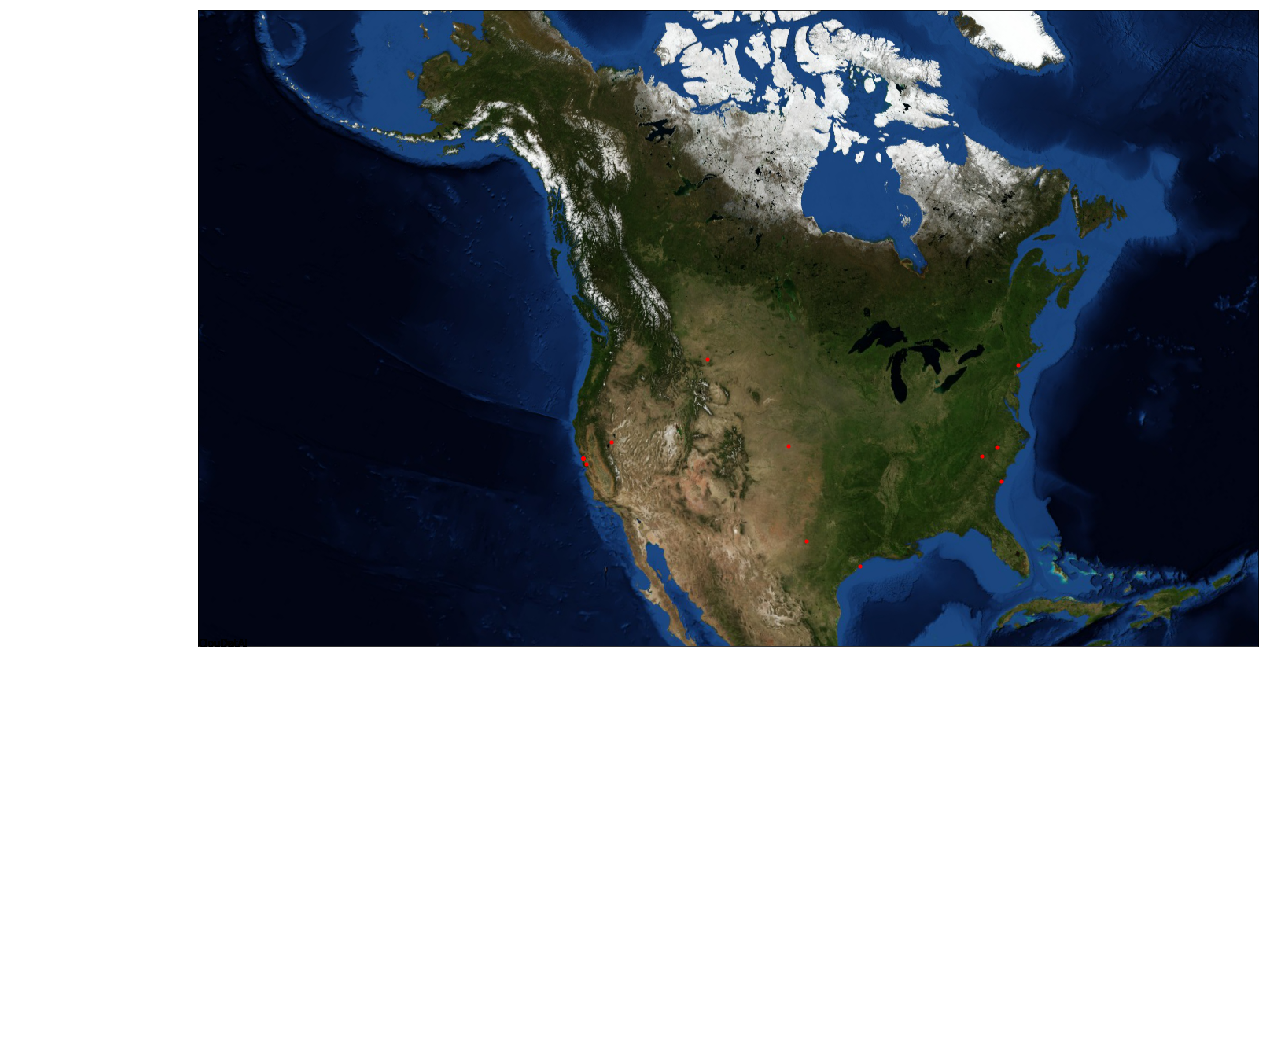

In [113]:
plt.show()